# Regression

__Regression Assumptions__:

* No Multicollearity between predictor valiable- VIF <5
* Predictior must be significantly correlated with target variable- P-Value <0.05
* linear relation between predictor and target
* Adj R2 >70%
* No heteroscadestocity ie residuals are normally distributed with consistent varience
* No Autocorrelation between residuals
* No outliers, if present need to be treated 
* No Endogenity

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import os, sys
import warnings
warnings.filterwarnings('ignore')

os.getcwd()


'C:\\Users\\Madhavi_J\\OneDrive - Dell Technologies\\My_data\\Madhavi\\Madhavi_downloads\\LBDSC24042022-20220918T125555Z-001\\LBDSC24042022\\Stats_ML_Sundram_sir\\Stats_ML_Weekend_Batch'

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import influence_plot
import scipy.stats  as stats
from sklearn.preprocessing import StandardScaler
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


In [5]:
df=pd.read_excel('/content/USA_Housing.xlsx')

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
dataset = df.copy()

In [8]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


__Observations:__
* Address column is text data and does not have significant info regarding target column hence we are dropping


In [9]:
dataset = dataset.drop(['Address'] , axis=1 ) 

## Preprocessing & EDA

#handling missing data
#handling outliers 
#feature scaling 
#encoding  
#handling imbalance 

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


__Observations:__
* from the info() , we can see there are no missing values 
* there is encoding required as not cat columns is there
* there is imbalence treatment is required as the target column is Continuos
* this is a regression problem

In [36]:
# missing values
def missing_value_check(data):
    print('Is there any missing value present or not?',data.isnull().values.any())
    missing_percentage = data.isnull().sum()*100/len(data)
    missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
    return missing_value_df[missing_value_df.missing_count != 0]
    
missing_value_check(dataset)

Is there any missing value present or not? False


,missing_count,missing_percentage


In [37]:
dataset.describe()
# there is proper varience in all the columns. varience threshold is good

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


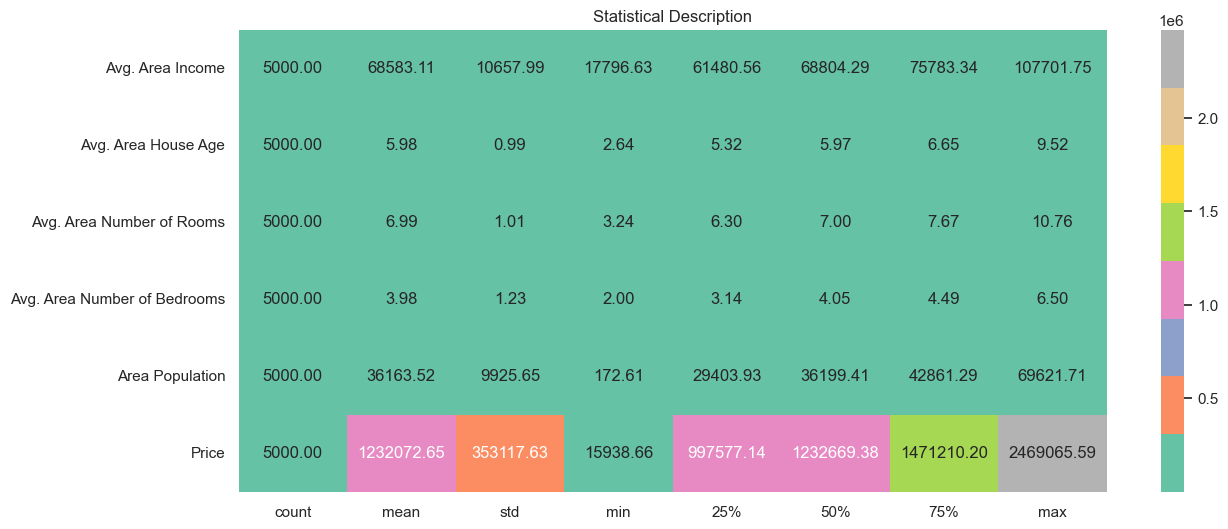

In [38]:
desc=dataset.describe().T
def descriptive_stats(df):   
    plt.figure(figsize=(14,6))
    sns.heatmap(df, annot=True, cmap='Set2', fmt=".2f")
    plt.title('Statistical Description')
    plt.show()


descriptive_stats(desc)

In [39]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        # duplicate = df[df.duplicated(keep = 'last')]
        #print(duplicate)
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(dataset)

# we dont have any duplicate records

'No duplicate entries'

In [40]:

cols= dataset.columns
cols

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

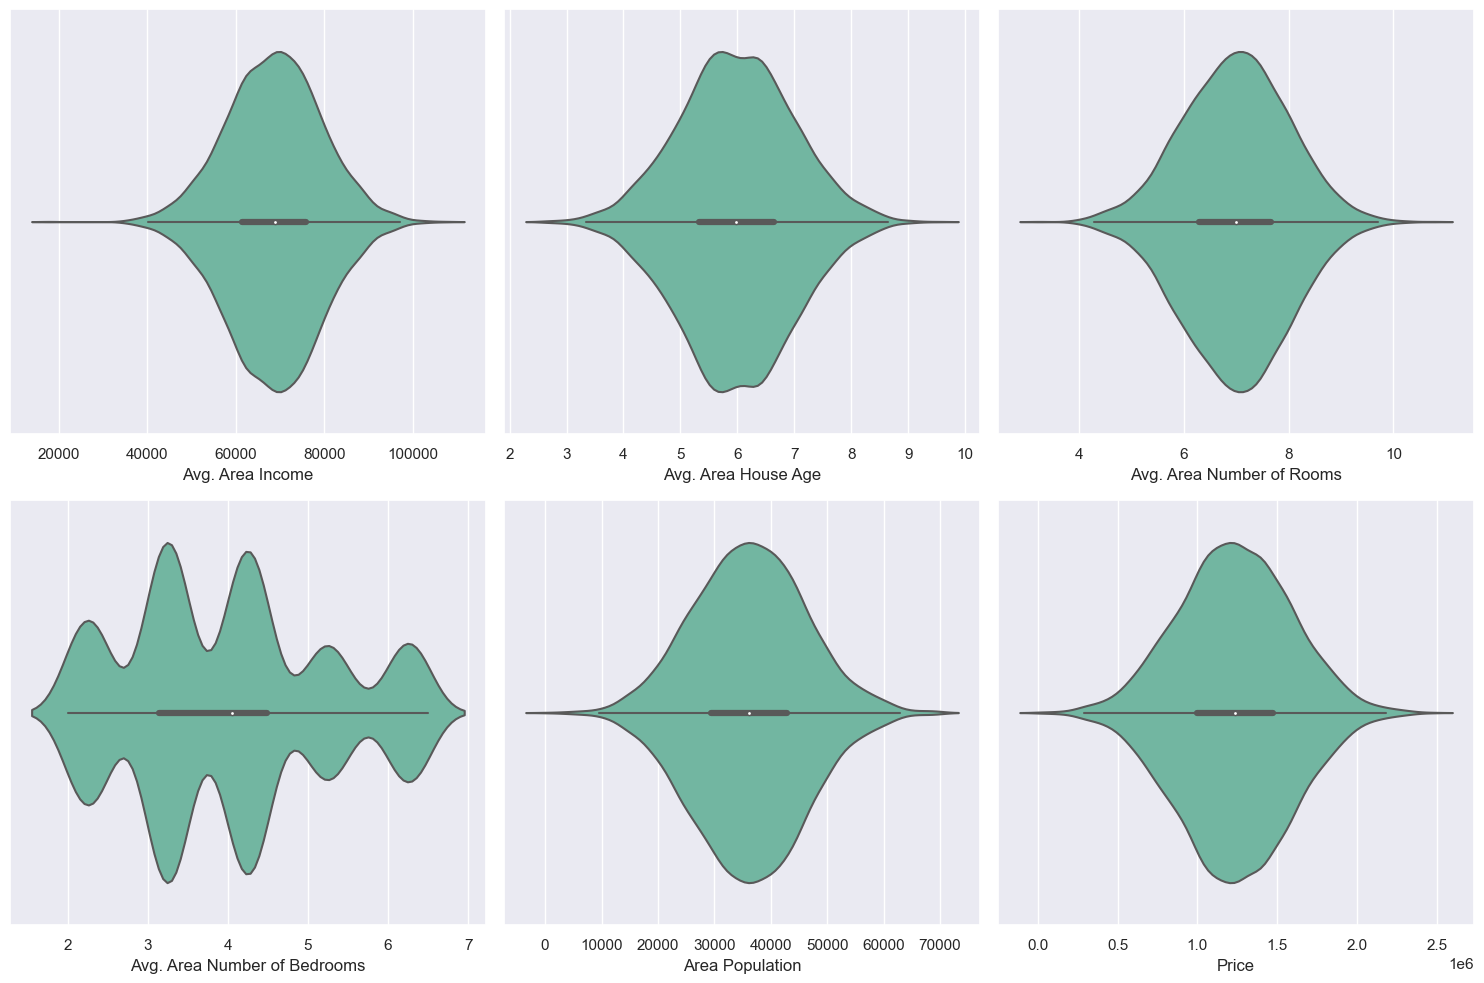

In [41]:
# create the figure and axes
fig, axes = plt.subplots(2, 3 , figsize=(15,10))
axes = axes.flatten()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.violinplot(data=dataset, x= dataset[col],  ax=ax ,palette ='Set2')


fig.tight_layout()
plt.show()

In [45]:
dataset['Avg. Area Number of Bedrooms'].unique()

array([4.09, 3.09, 5.13, 3.26, 4.23, 4.04, 3.41, 2.42, 2.3 , 6.1 , 4.1 ,
       4.49, 3.1 , 2.27, 4.37, 4.01, 3.12, 4.3 , 5.12, 5.49, 4.07, 2.1 ,
       4.31, 6.34, 4.33, 2.03, 4.  , 3.04, 3.24, 4.42, 5.36, 6.29, 6.  ,
       2.07, 3.01, 2.39, 2.5 , 2.17, 6.3 , 4.43, 4.44, 6.32, 3.18, 6.35,
       3.22, 2.13, 4.02, 6.36, 3.32, 4.12, 6.41, 5.08, 3.06, 2.28, 4.2 ,
       4.32, 5.43, 3.13, 3.28, 3.27, 3.08, 3.17, 3.15, 6.25, 3.43, 4.38,
       6.16, 4.28, 4.11, 6.24, 3.35, 4.48, 3.2 , 3.07, 3.39, 3.38, 6.06,
       3.3 , 3.46, 3.33, 4.41, 2.38, 2.37, 3.45, 2.02, 2.14, 2.23, 2.44,
       2.29, 4.19, 6.04, 5.28, 5.1 , 5.45, 4.36, 2.05, 6.39, 4.45, 4.22,
       6.44, 4.35, 3.37, 6.2 , 6.19, 2.49, 2.04, 4.46, 5.15, 3.21, 6.45,
       3.44, 2.18, 3.49, 6.26, 4.14, 4.27, 5.04, 4.06, 6.4 , 3.25, 5.33,
       3.  , 2.47, 3.31, 3.14, 4.18, 5.07, 6.11, 2.  , 5.3 , 4.26, 2.31,
       3.48, 3.29, 3.11, 3.36, 2.15, 6.18, 5.25, 4.47, 5.21, 4.15, 6.37,
       6.49, 6.28, 2.09, 4.29, 6.21, 2.08, 4.24, 2.

__Observations:__
* All the columns except 'Avg Area number of bedrooms' are continuous and normally distributed
* 'Avg Area number of bedrooms' is a multimodal distribution


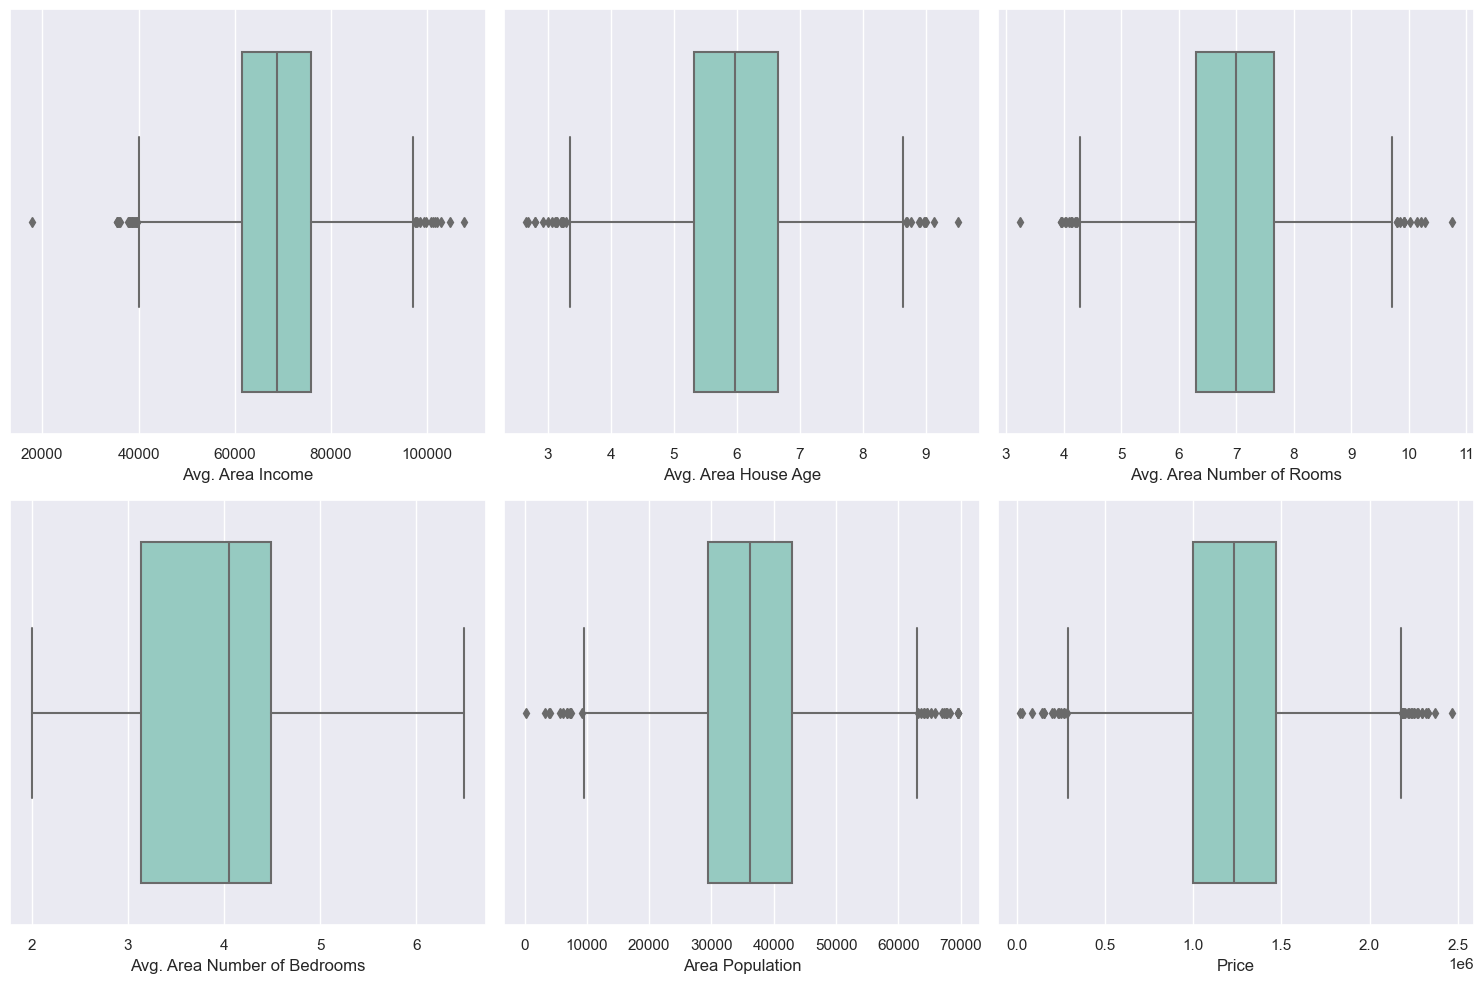

In [43]:
# create the figure and axes
fig, axes = plt.subplots(2, 3 , figsize=(15,10))
axes = axes.flatten()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.boxplot(data=dataset, x= dataset[col],  ax=ax,palette ='Set3')
   # sns.swarmplot(data=dataset, x= dataset[col],  ax=g)


fig.tight_layout()
plt.show()

__Observations:__
* below columns have outliers that need to be treated except Price (target column)
    - 'Avg. Area Income'
    - 'Avg. Area Income'
    - 'Avg. Area House Age'
    - 'Avg. Area Number of Rooms'
    - 'Area Population'
    - Price
* Avg. Area Number of Bedrooms' does not have outliers

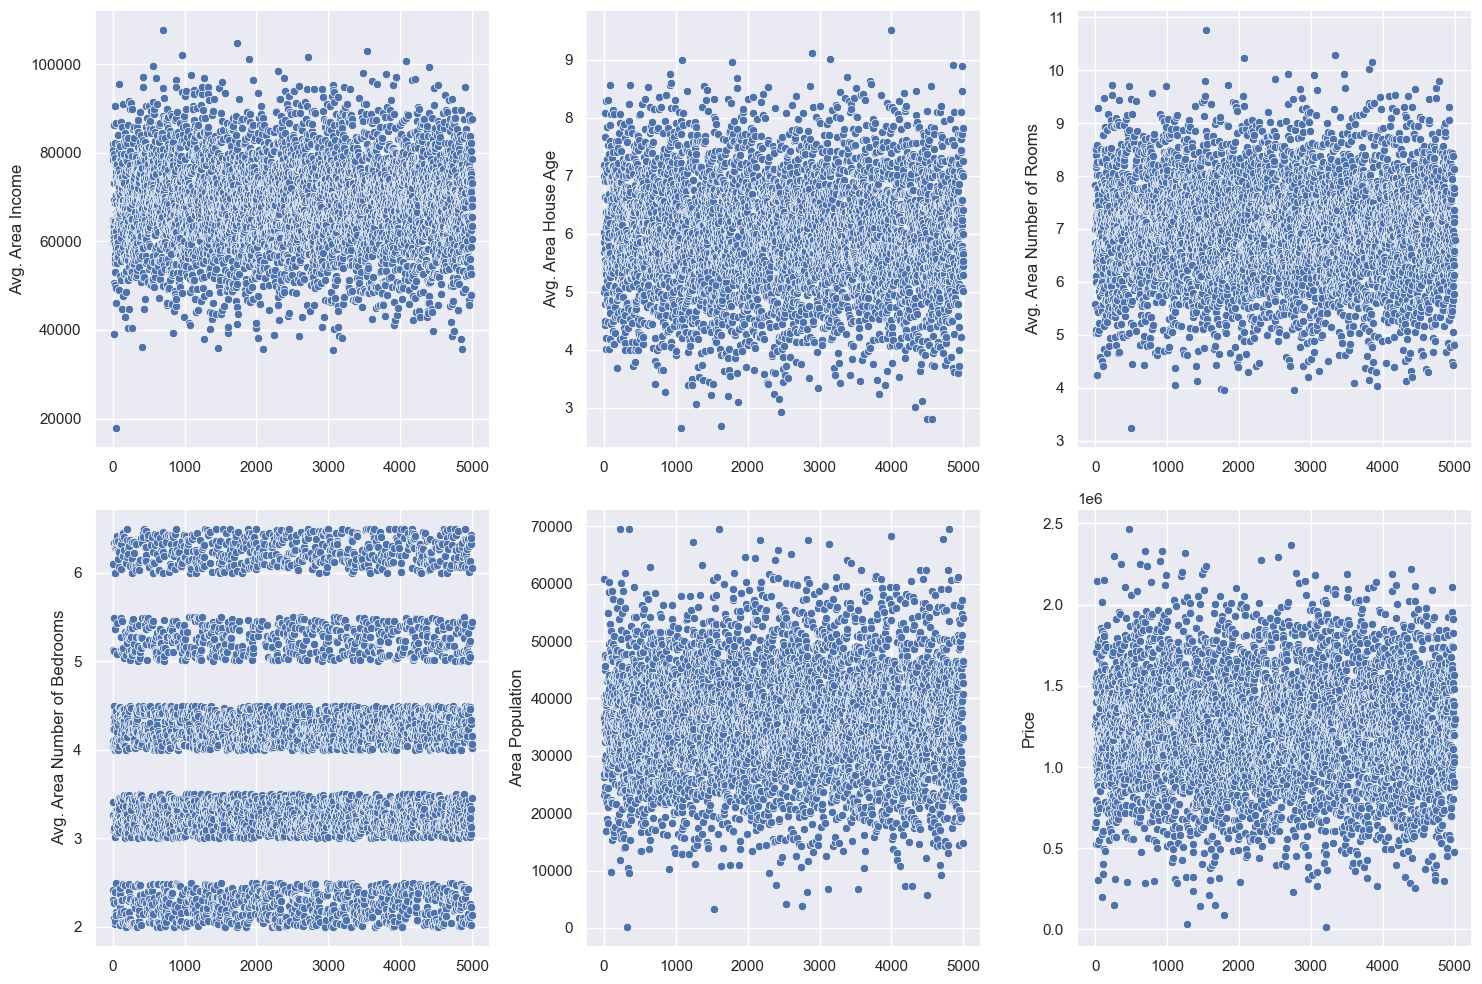

In [44]:
#### Visualizing numeric columns ######

#numeric_cols = data.select_dtypes(include = np.number) ### selects numeric columns
#column_names = list(numeric_cols.columns)

cols = (dataset.columns)
fig, axes = plt.subplots(2, 3 , figsize=(15,10))
axes = axes.flatten()  
for col, ax in zip(cols, axes):
    sns.scatterplot(data=dataset, y= dataset[col] ,x=dataset.index ,ax=ax)

fig.tight_layout()
plt.show()

__Observations:__
* Here we can see the data points scatterplot distribution for each columns 

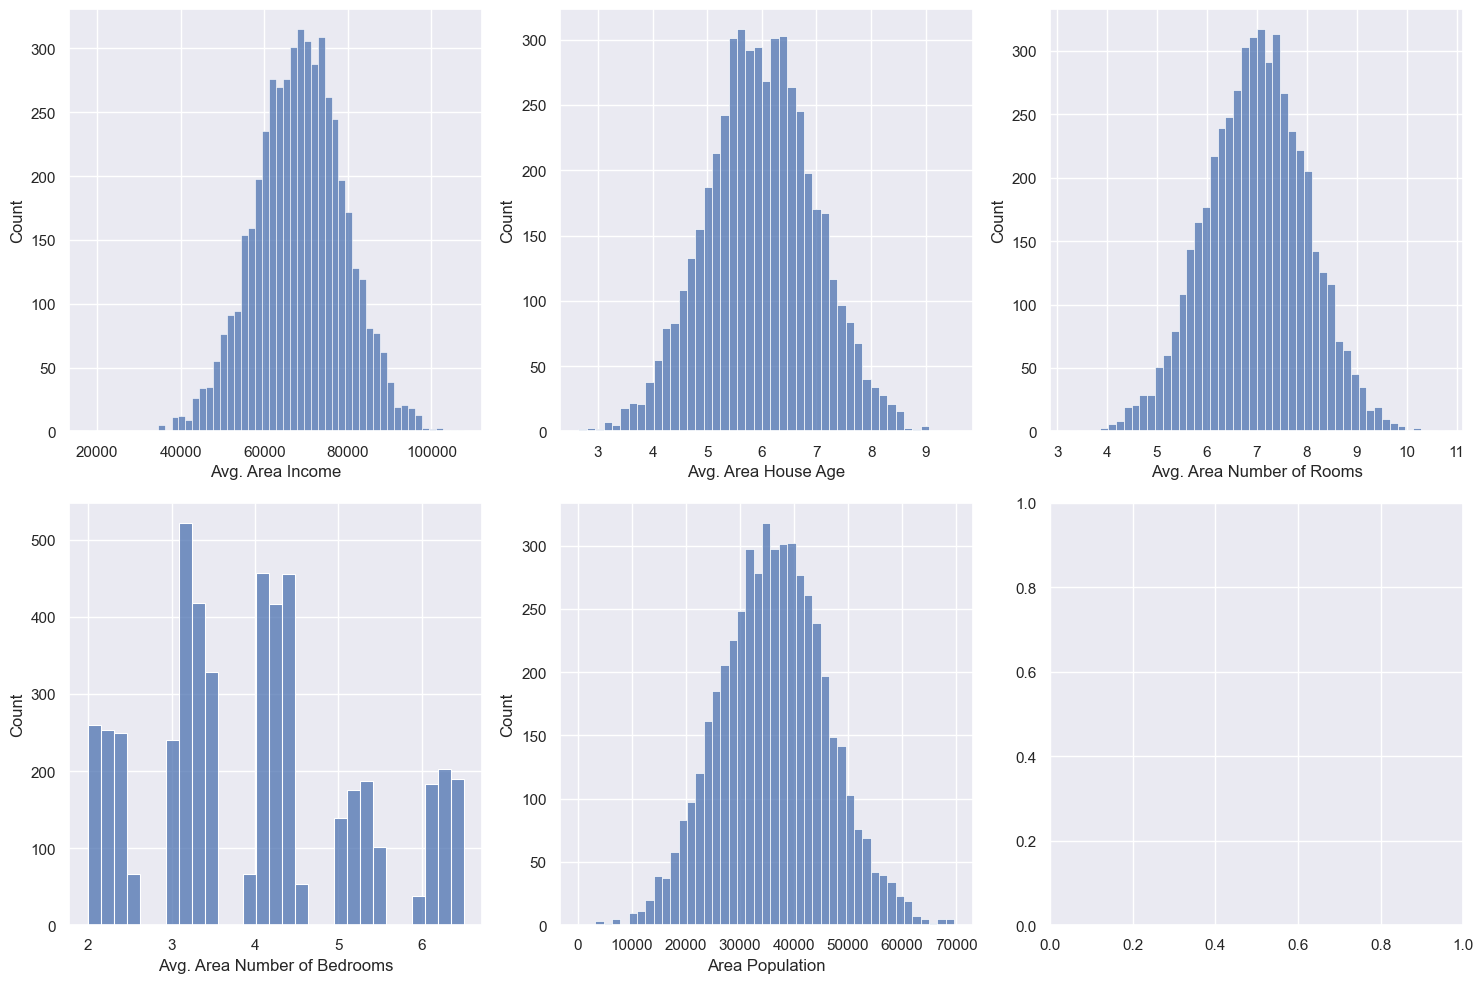

In [46]:
# create the figure and axes
fig, axes = plt.subplots(2, 3 , figsize=(15,10))
axes = axes.flatten()  # flattening the array makes indexing easier

for col, ax in zip(cols[:-1], axes):
    sns.histplot(data=dataset, x= dataset[col],  ax=ax)
   # sns.swarmplot(data=dataset, x= dataset[col],  ax=g)


fig.tight_layout()
plt.show()

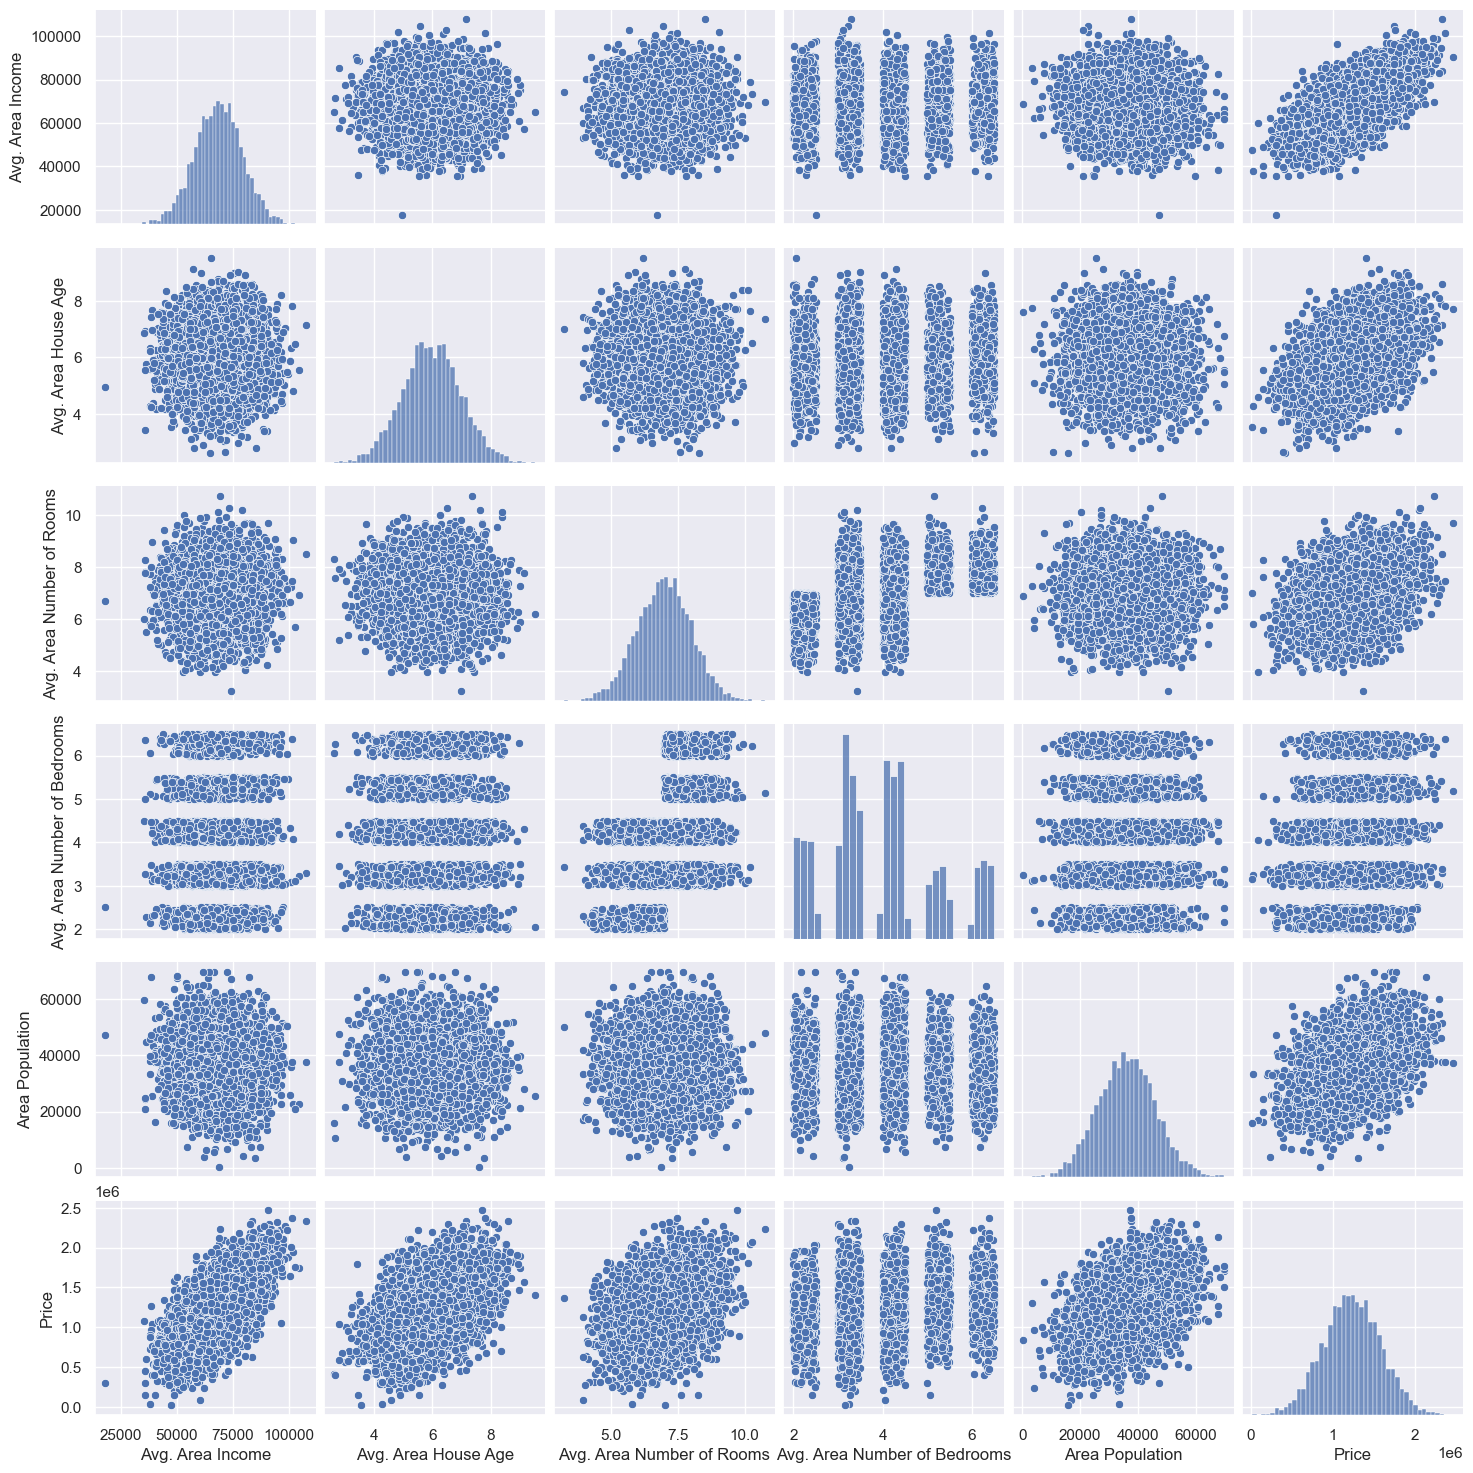

In [50]:
sns.pairplot(data=dataset ,palette ='rainbow' )

<Axes: >

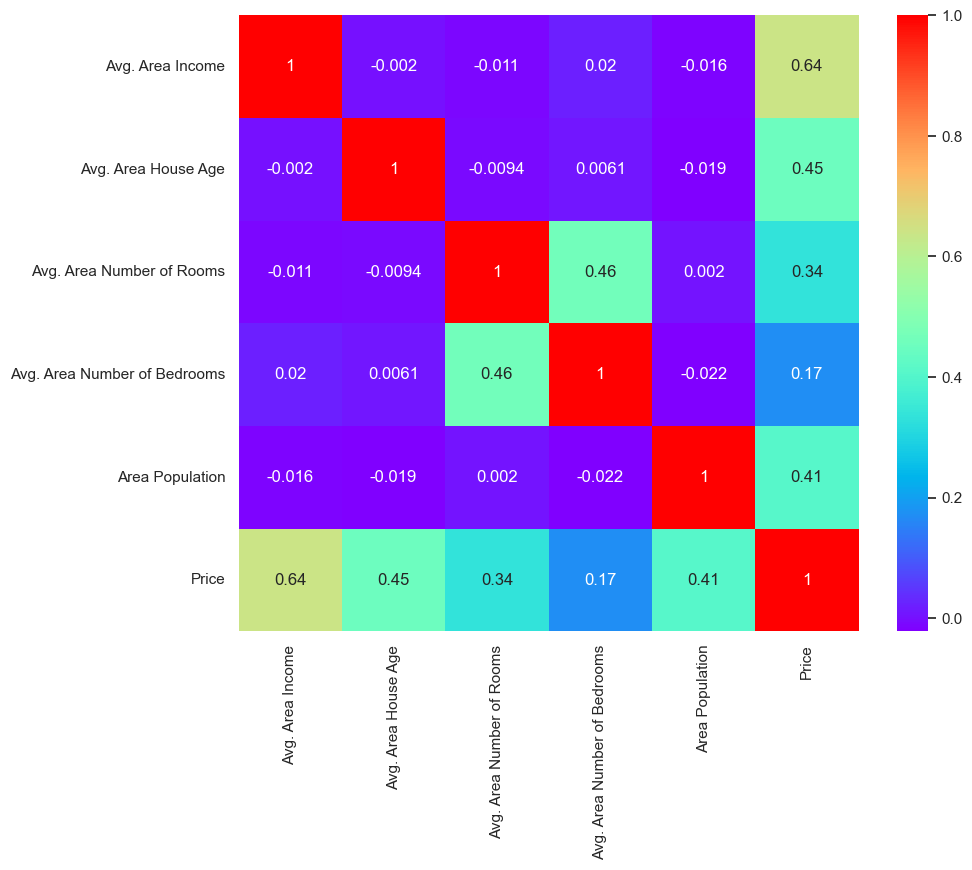

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(method='pearson') ,cmap='rainbow' , annot =True)

__Observations:__
* 'Avg. Area Income' column have high positive correlation  have outliers that need to be treated except Price (target column)
* 'Avg. Area Income' and 'Avg. Area House Age','Area Population' are moderately correlated with Target variable
* there is no correlation between independent variables

In [ ]:
#We see that there are lots of outliers and there is linear relation between IDv and DV.

In [52]:
# Skewness

dataset.skew()

Avg. Area Income               -0.033720
Avg. Area House Age            -0.007214
Avg. Area Number of Rooms      -0.040996
Avg. Area Number of Bedrooms    0.376240
Area Population                 0.050650
Price                          -0.002718
dtype: float64

In [54]:
# Kurtosis
dataset.kurtosis()

# all the values are less than 0 are platykurtic and greater than 0 are leptokurtic

Avg. Area Income                0.045574
Avg. Area House Age            -0.083437
Avg. Area Number of Rooms      -0.074652
Avg. Area Number of Bedrooms   -0.701566
Area Population                -0.006733
Price                          -0.054918
dtype: float64

# outlier treatment

In [56]:
# instead of dropping the data , we can use capping and flooring 
IQR =dataset.quantile(0.75)-dataset.quantile(0.25)
dataset= dataset[~( (dataset>(dataset.quantile(0.75) + 1.5*IQR ))| (dataset<(dataset.quantile(0.25) - 1.5*IQR ))).any(axis=1) ]


# the outliers need not be dropped in every case. Always check with stakeholders regarding outlier treatment.
# instead of dropping records , we can use flooring and capping methods where we will cap values greater 1.5IQR+3rdQuntile
#and floor values less than 1.5IQR-1stQuantile

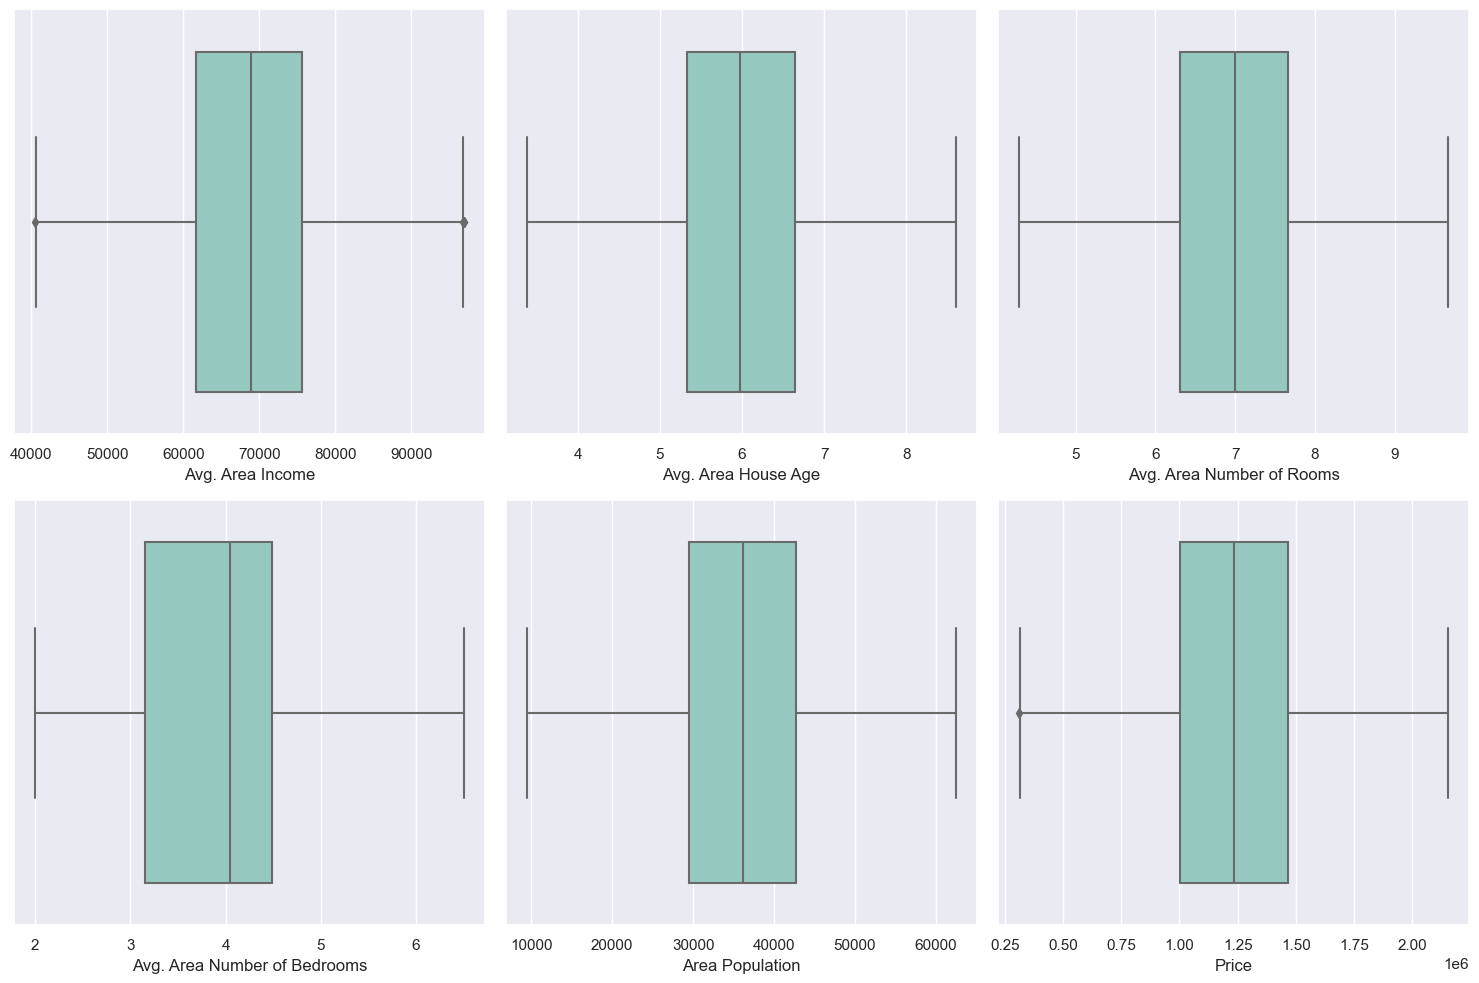

In [59]:
# lets check the box plot again after outlier treatment
fig, axes = plt.subplots(2, 3 , figsize=(15,10))
axes = axes.flatten() 
for col, ax in zip(cols, axes):
    sns.boxplot(data=dataset, x= dataset[col],  ax=ax, palette='Set3')
   # sns.swarmplot(data=dataset, x= dataset[col],  ax=g)


fig.tight_layout()
plt.show()

# Feature and Target

In [60]:
X= dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

In [61]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [62]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

# Train Test split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.75 , random_state=101)

In [64]:
print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)

x_train shape (3633, 5)
x_test shape (1211, 5)


# Scaling

In [65]:
std_scaler=StandardScaler()
x_scaled=std_scaler.fit_transform(x_train)
x_test_scaled=std_scaler.transform(x_test)

# Variance Inflation Factor

In [66]:
#Check Multicolinearity
import scipy.stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

#variable= X
vif=pd.DataFrame()
vif['variance inflation factor']= [variance_inflation_factor(x_scaled, i) for i in range(len(X.columns))]
vif['Features']=X.columns

vif

,variance inflation factor,Features
0,1.002990,Avg. Area Income
1,1.001703,Avg. Area House Age
2,1.272103,Avg. Area Number of Rooms
3,1.271797,Avg. Area Number of Bedrooms
4,1.001928,Area Population


__Observations:__
* All the colums have VIF value <5 hence we dont have multicolliearity in Predictors 


# Model Building

## OLS

In [73]:
x_train =sm.add_constant(x_train)
model= sm.OLS(y_train, x_train )
results=model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     7485.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:11:35   Log-Likelihood:                -46973.
No. Observations:                3633   AIC:                         9.396e+04
Df Residuals:                    3627   BIC:                         9.400e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.231e+06   1656.809    743.157      0.000    1.23e+06    1.23e+06
x1          2.207e+05   1659.284    133.029      0.000    2.17e+05    2.24e+05
x2           1.57e+05   1658.219     94.651      0.000    1.54e+05     1.6e+05
x3            1.2e+05   1868.674     64.239      0.000    1.16e+05    1.24e+05
x4          1446.9468   1868.449      0.774      0.439   -2216.369    5110.262
x5          1.443e+05   1658.405     87.033      0.000    1.41e+05    1.48e+05
==============================================================================
Omnibus:                        5.644   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.938
Skew:                           0.020   Prob(JB):                       0.0847
Kurtosis:                       2.824   Cond. No.                         1.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# P-Value Check

In [88]:
def pValueCheck(b):
    if b < 0.05:
        return 'Yes'
    else:
        return 'No'
df_result=pd.DataFrame()
df_result['pvalues']=results.pvalues[1:]
df_result['Statistically significant?']= df_result['pvalues'].apply(pValueCheck)
df_result.index=X.columns
df_result

,pvalues,Statistically significant?
Avg. Area Income,0.000000,Yes
Avg. Area House Age,0.000000,Yes
Avg. Area Number of Rooms,0.000000,Yes
Avg. Area Number of Bedrooms,0.438738,No
Area Population,0.000000,Yes


__Observations:__
* R2 = 91% , Adj R2= 91% 
* All the variables have p-value < 0.05 except Avg. Area Number of Bedrooms . The columns  Avg. Area Number of Bedrooms is statistically non significant
* There is no autocorrelation  as Durbin watson test value is between 1.5 to 2.5 and all variables are significantly related with target


In [68]:
results.params

const                          -2.611131e+06
Avg. Area Income                2.150288e+01
Avg. Area House Age             1.639790e+05
Avg. Area Number of Rooms       1.204078e+05
Avg. Area Number of Bedrooms    1.167157e+03
Area Population                 1.496641e+01
dtype: float64

## SKLearn Linear Regression

In [74]:
# lets use sklrean for prediction

lr= LinearRegression()
lr.fit(x_scaled, y_train)
print(lr.coef_)
print(lr.intercept_)

[220733.15673278 156952.61925804 120041.23116182   1446.94684545
 144336.03258034]
1231268.3780203375


In [75]:
y_pred=lr.predict(x_scaled)
y_pred_test=lr.predict(x_test_scaled)

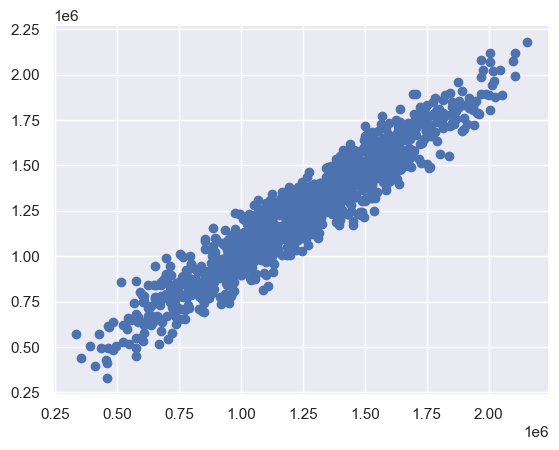

In [78]:
plt.scatter(y_test, y_pred_test)

In [79]:
r2_score(y_train ,y_pred )

0.9116524170621771

In [80]:
r2_score(y_test ,y_pred_test )

0.9054434119960186

# Residual Diagnostics

# Cooks Distance plot

<StemContainer object of 3 artists>

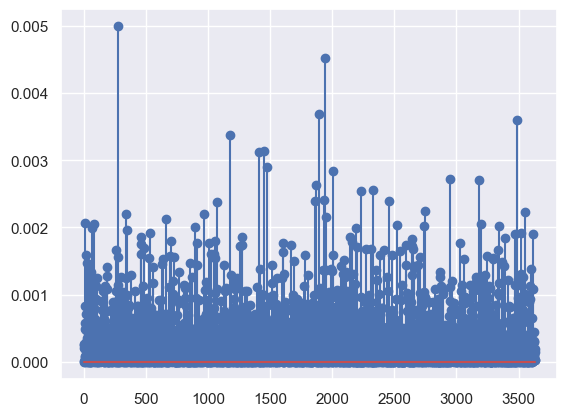

In [81]:
plt.stem(range(len( results.get_influence().cooks_distance[0] )) , results.get_influence().cooks_distance[0])

__Observations:__
* All Cook's Distance value is less than 1 hence there is no influential record in dataset

In [82]:
leverage = results.get_influence().hat_matrix_diag
leverage

array([0.00247162, 0.0009759 , 0.00091871, ..., 0.00206002, 0.00080563,
       0.00137601])

# Studentised residual vs Leverage plot/ Influence plot

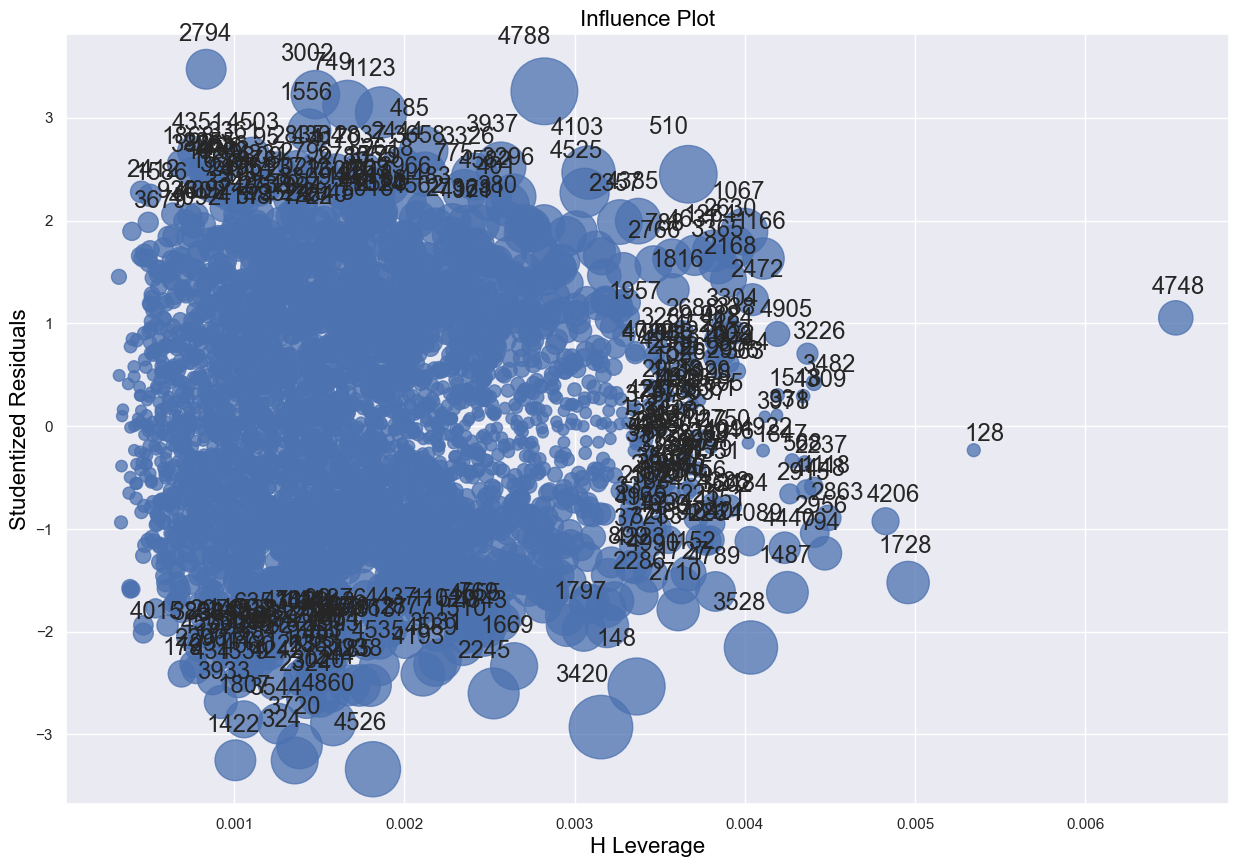

In [83]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax= plt.subplots(1,1, figsize=(15,10))
influence_plot(results ,   criterion='cooks' , ax=ax)
plt.show()

In [76]:
3* 6/x_train.shape[0] # if Leverage > 3(k+1)/n then drop those observation

0.004934210526315789

# Residuals vs fitted

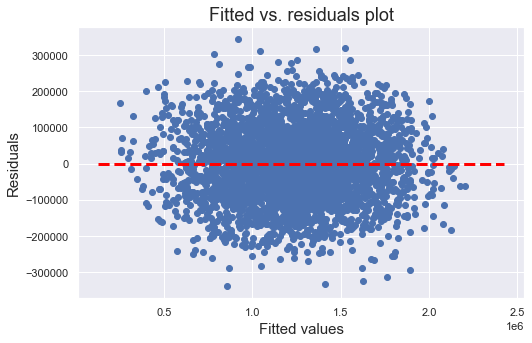

In [90]:
#residual plot with OLS

plt.figure(figsize=(8,5))
p= plt.scatter(results.fittedvalues , results.resid, edgecolors= 'b')
xmin=min(results.fittedvalues)
xmax = max(results.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.5,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

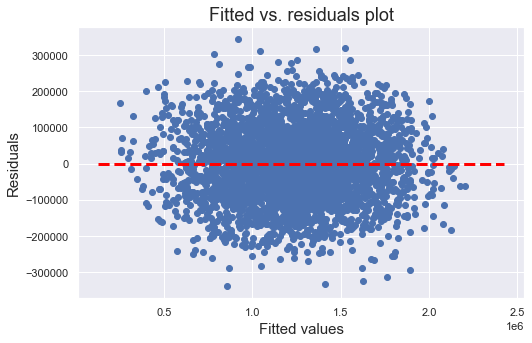

In [98]:
#residual plot with sklearn

plt.figure(figsize=(8,5))
p= plt.scatter (y_pred , y_train-y_pred, edgecolors= 'b')
xmin=min(y_pred)
xmax = max(y_pred)
plt.hlines(y=0,xmin=xmin*0.5,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

__Observation__:

If the plot exhibits a pattern, we need to worry.

The funnel shape pattern means heteroskedasticity.

Remedy: A non-linear correction might fix the problem. Transformation of the response variable such as log(Y) or √Y

The parabolic shape pattern means the model didn’t capture non-linear effects.

Remedy: This case requires a non-linear transformation of predictors such as log (X), √X

We should also think about a point: non-constant variance arises due to the presence of outliers.

# Residual Histogram

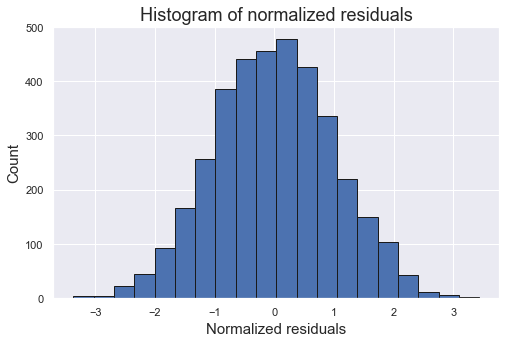

In [92]:
# residual histogram

plt.figure(figsize=(8,5))
plt.hist(results.resid_st,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

__Observation__:
Residuals are normally distibuted

# QQ plot

<Figure size 576x360 with 0 Axes>

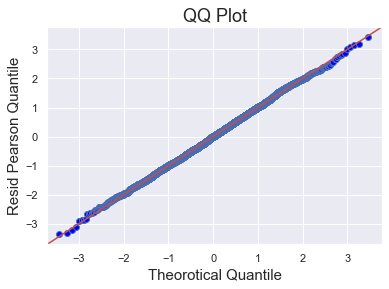

In [96]:
# QQ plot
plt.figure(figsize=(8,5))
q= sm.qqplot(results.resid_pearson ,line='45',fit='True' )
plt.xlabel('Theorotical Quantile',fontsize=15)
plt.ylabel('Resid Pearson Quantile',fontsize=15)
plt.title('QQ Plot' ,fontsize=18)
plt.show()

__Observation__:
The quantile to quantile plot shows residuals are normally distributed 

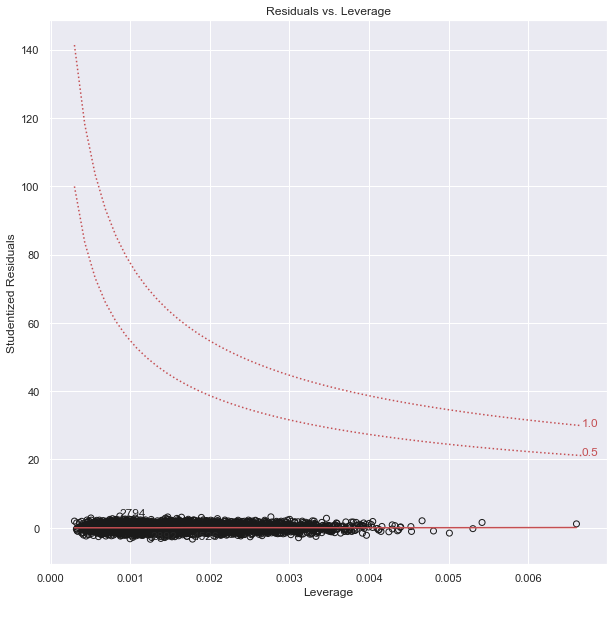

In [136]:
#residual vs leverage
from statsmodels.nonparametric.smoothers_lowess import lowess

student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
student_residuals.index = results.resid.index
df = pd.DataFrame(student_residuals)
df.columns = ['student_residuals']
df['leverage'] = results.get_influence().hat_matrix_diag
smoothed = lowess(df['student_residuals'],df['leverage'])
sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
top3 = sorted_student_residuals[:3]

fig, ax = plt.subplots(figsize=(10,10))
x = df['leverage']
y = df['student_residuals']
xpos = max(x)+max(x)*0.01 
x = df['leverage']
y = df['student_residuals']

xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')


ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')


for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))
    
# p = k+1 > k=  no of features 
#cooks line is  
#Square root of(factor* (k+1)* (1-(linspace( min(levarage), (max(levarage)++max(levarage)*0.01), 50) ))/
                                #(linspace( min(levarage) , (max(levarage)++max(levarage)*0.01), 50)))

# cooks line-- √(factor*(k+1) (1-range_num) /range_num)  where range ( min(leverage) , max(leverage)

cooksx = np.linspace(min(x), xpos, 50)
p = len(results.params)
poscooks1y = np.sqrt( (p*(1-cooksx) )/cooksx )
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx) 
ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
#ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
#ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
plt.show()

__Observation__:
The residual vs leverage plot shows that there is not influential record in the dataset which can influenc regression line 